In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
data = pd.read_csv('/home/l/Downloads/digit-recognizer/train.csv')

In [29]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y = data['label']
X = data.drop(['label'],axis=1)

m,n = X.shape

Y = np.array(Y)
X = np.array(X)


X = X.T
X.shape

(784, 42000)

In [10]:
indices = np.random.permutation(len(Y))

X = X[:,indices]
Y = Y[indices]

In [16]:
W1 = np.random.randn(10, n) * np.sqrt(2 / n)
B1 = np.random.randn(10,1) * np.sqrt(2 / 10)
W2 = np.random.randn(10,10) * np.sqrt(2 / 10)
B2 = np.random.randn(10,1) * np.sqrt(2 / 10)
W3 = np.random.randn(10,10) * np.sqrt(2 / 10)
B3 = np.random.randn(10,1) * np.sqrt(2 / 10)

In [19]:
weights = np.load("Model_weights.npz")

W1 = weights['W1']
W2 = weights['W2']
W3 = weights['W3']
B1 = weights['B1']
B2 = weights['B2']
B3 = weights['B3']

In [136]:
def relu(x):
    return np.maximum(x,0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True)) 
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)  
    
def deriv_relu(x):
    return (x > 0).astype(int)

In [128]:
def train_test_split(x, y, test_size=0.2):
    num = int((1 - test_size) * m)
    x_train = x[:, :num]
    y_train = y[:num]
    x_test = x[:, num:]
    y_test = y[num:]
    
    return x_train, y_train, x_test, y_test

def one_hot_enc(y, classes=10):
    one_hot = np.zeros((y.size, classes))
    one_hot[np.arange(y.size), y] = 1
    
    return one_hot

In [129]:
def fwd_prop(x, W1, B1, W2, B2, W3, B3):
    
    Z1 = np.dot(W1,x) + B1
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + B2
    A2 = relu(Z2)
    Z3 = np.dot(W3,A2) + B3
    A3 = softmax(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3


def back_prop(x, y, Z1, A1, Z2, A2, Z3, A3, b_s=1):
    dZ3 = A3 - y
    dW3 = np.dot(dZ3,A2.T) / b_s 
    dB3 = np.sum(dZ3, axis=1, keepdims=True) / b_s
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = dA2 * deriv_relu(Z2) 
    dW2 = np.dot(dZ2, A1.T) / b_s
    dB2 = np.sum(dZ2, axis=1, keepdims=True) / b_s

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * deriv_relu(Z1)
    dW1 = np.dot(dZ1, x.T) / b_s
    dB1 = np.sum(dZ1, axis=1, keepdims=True) / b_s
     
    return dW3, dB3, dW2, dB2, dW1, dB1

In [75]:
A1.shape

(10, 10)

In [166]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y)
batch_size = 10
eta = 0.0001
eta_decay = 0.995
Y_train.shape

(33600,)

In [320]:
for epoch in range(300):
    for i in range(0, X_train.shape[1], batch_size):
       
        X_batch = X_train[:,i:i+batch_size]
        Y_target = one_hot_enc(Y_train[i:i+batch_size]).T
    
    
        Z1, A1, Z2, A2, Z3, A3 = fwd_prop(X_batch, W1, B1, W2, B2, W3, B3)
        dW3, dB3, dW2, dB2, dW1, dB1 = back_prop(X_batch, Y_target, Z1, A1, Z2, A2, Z3, A3, b_s=10)

        loss = -np.mean(Y_target * np.log(A3 + 1e-8))

        W1 -= eta*dW1
        W2 -= eta*dW2
        W3 -= eta*dW3
        B1 -= eta*dB1
        B2 -= eta*dB2
        B3 -= eta*dB3

    if epoch%20 == 0 :
        print(f'Epoch {epoch+1}/{400}, Loss: {loss:.4f}')

    if epoch > 700:
        eta *= eta_decay


Epoch 1/400, Loss: 0.0444
Epoch 21/400, Loss: 0.0441
Epoch 41/400, Loss: 0.0436
Epoch 61/400, Loss: 0.0434
Epoch 81/400, Loss: 0.0423
Epoch 101/400, Loss: 0.0423
Epoch 121/400, Loss: 0.0424
Epoch 141/400, Loss: 0.0420
Epoch 161/400, Loss: 0.0428
Epoch 181/400, Loss: 0.0417
Epoch 201/400, Loss: 0.0422
Epoch 221/400, Loss: 0.0434
Epoch 241/400, Loss: 0.0434
Epoch 261/400, Loss: 0.0434
Epoch 281/400, Loss: 0.0441


In [321]:
np.savez("Model_weights.npz", W1=W1, W2=W2,W3=W3, B1=B1, B2=B2, B3=B3)

In [47]:
total_loss = 0
for i in range(0, X_test.shape[1]):

    X_batch_test = X_test[:,i].reshape(-1,1)
    Y_targ = one_hot_enc(Y_test[i]).T

    Z1, A1, Z2, A2, Z3, Y_predict = fwd_prop(X_batch_test, W1, B1, W2, B2, W3, B3)
    training_loss = -np.mean(Y_targ * np.log(Y_predict + 1e-8))

    if i % 100 == 0:
        print(f'Epoch {i+1}, Loss {training_loss}')
    total_loss += training_loss

avg_loss = total_loss / X_test.shape[1]
print(f'Average loss = {avg_loss}')

Epoch 1, Loss 0.0029602748441062586
Epoch 101, Loss 0.009851308882221325
Epoch 201, Loss 0.009851308882221325
Epoch 301, Loss 0.009851308882221325
Epoch 401, Loss 0.0323428096328465
Epoch 501, Loss 5.101187783073806e-07
Epoch 601, Loss 0.014794688793444408
Epoch 701, Loss 0.005007115753663362
Epoch 801, Loss 0.02870013414465545
Epoch 901, Loss 0.012342734631082371
Epoch 1001, Loss 0.004708442817029615
Epoch 1101, Loss 0.0054234197246542295
Epoch 1201, Loss 0.4249663919175424
Epoch 1301, Loss 0.011761596778110225
Epoch 1401, Loss 0.016238156532047177
Epoch 1501, Loss 0.008377273897537089
Epoch 1601, Loss 0.031577041858318285
Epoch 1701, Loss 0.0009579583244706145
Epoch 1801, Loss 0.007571352582923842
Epoch 1901, Loss 0.012064625620727965
Epoch 2001, Loss 0.020454797376947588
Epoch 2101, Loss 0.0003175497251489994
Epoch 2201, Loss 3.035958197627883e-09
Epoch 2301, Loss 0.007732943469170013
Epoch 2401, Loss 0.00043681971134927123
Epoch 2501, Loss 0.0001058004380071774
Epoch 2601, Loss 0.0

In [3]:
import cv2

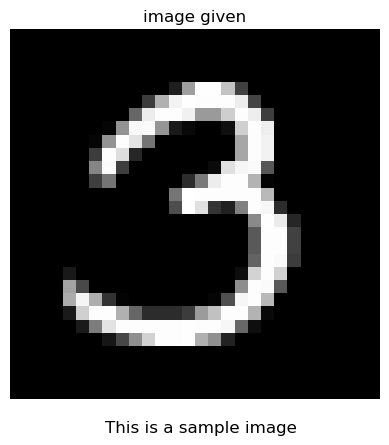

In [309]:
one_hot_enc(label)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [310]:
image_used.shape

(784, 1)

In [316]:
def predict_number(image, W1, B1, W2, B2, W3, B3):

    _, _, _, _, _, Y_pred = fwd_prop(image, W1, B1, W2, B2, W3, B3)

    prediction = np.argmax(Y_pred)

    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.title(f'Label = {label}')
    plt.axis('off')
    plt.text(14, 30, f"Prediction = {prediction}", fontsize=12, ha='center')
    plt.show()



    return prediction

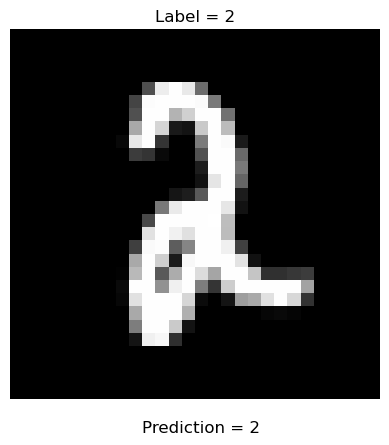

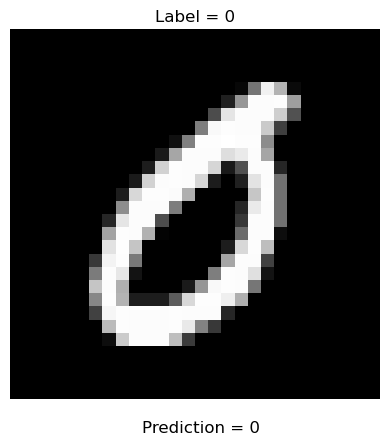

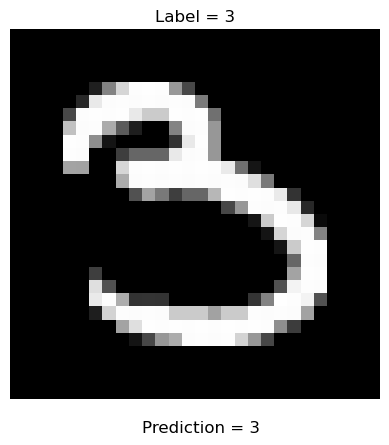

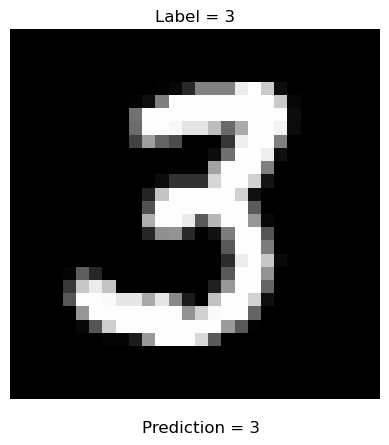

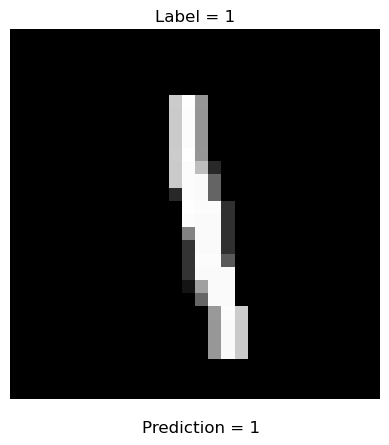

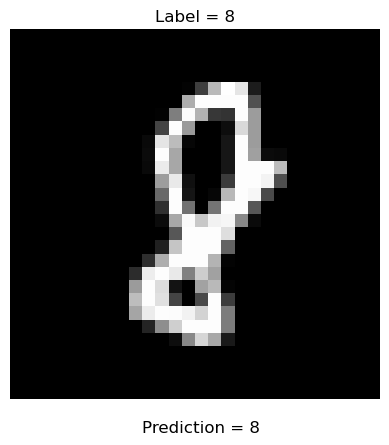

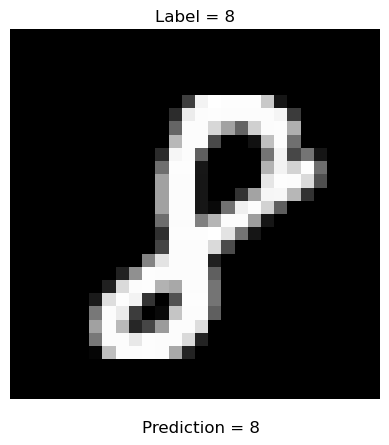

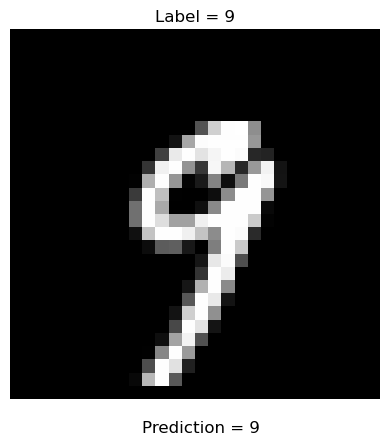

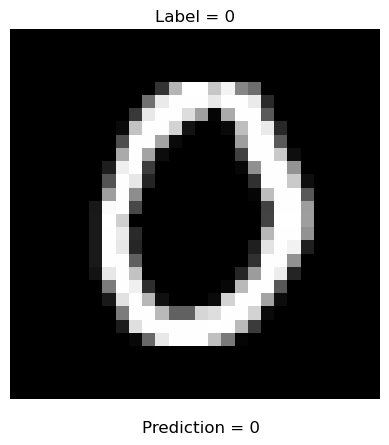

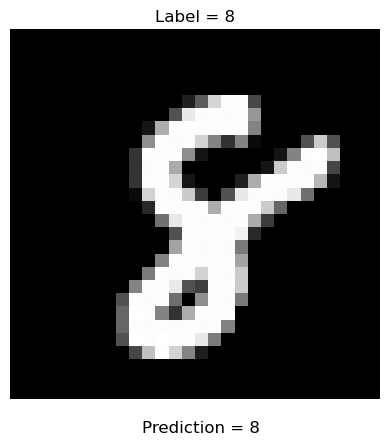

In [318]:
for i in range(0, 10):
    
    rand = np.random.randint(0,42000)
    image_used = data.drop(['label'],axis=1).iloc[rand,:].values.reshape(-1,1)
    imag = image_used.reshape(28,28)
    label = data['label'].iloc[rand]

    predict_number(image_used, W1, B1, W2, B2, W3, B3)